#Função a ser aproximada: Griewank

## **Plot 2D da função Griewank**

![alt text](http://2.bp.blogspot.com/_otsWqKrA2RI/TJHH5DguZjI/AAAAAAAAACo/01VNZLSvrlo/s400/fn_griewank.bmp)

### **Definição e ótimo global:**

![alt text](https://www.cs.unm.edu/~neal.holts/dga/benchmarkFunction/images/griewankLatex.png)

#Declarar a função

In [1]:
import math
def Griewank(input):
    sum = 0
    for x in input:
        sum += x * x
    product = 1
    for i in range(len(input)):
        product *= math.cos(input[i] / math.sqrt(i + 1))
    return 1 + sum / 4000 - product

In [2]:
#Teste de chamada para duas variáveis
Griewank([2,3])

0.7855494848011055

#Amostragem da função a ser aproximada

In [3]:
import random
n = 2
samples = 1000

random_samples = []
for sample in range(samples):
  input = []
  for i in range(n):
    input.append(random.random())
  random_samples.append(input)

#converte para numpy array
import numpy as np
random_samples = np.array(random_samples)

random_samples[0:5] # 5 primeiras amostras

array([[3.67568519e-01, 9.74207826e-01],
       [5.00073862e-01, 2.81609030e-01],
       [3.02519688e-04, 3.04047180e-02],
       [5.91912210e-01, 3.06269448e-01],
       [2.64697359e-01, 2.56344178e-01]])

In [4]:
#Saída para cada input
y = []
for i in random_samples:
  y.append(Griewank(i))

#Separar base em treino e validação

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(random_samples, y, test_size = 0.2, shuffle=True)

#Treinamento da Rede Neural para aproximar a função

In [6]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [7]:
# Importando as bibliotecas do Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
# Iniciando a Rede Neural
classifier = Sequential()

# Adicionando a camada de input e a primeira camada escondida
classifier.add(Dense(units = 6, activation = 'relu', input_dim = n))
classifier.add(Dropout(rate = 0.1))

# Adicionando a camada de saída
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede neural
classifier.compile(optimizer = 'adam', loss = 'mse')

# Visualização das camadas da rede
classifier.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 18        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Treinando a rede neural
trained_model = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500, 
                               validation_data = (X_val,y_val))


Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - 0s 372us/step - loss: 0.0756 - val_loss: 0.0694
Epoch 2/500
800/800 [==============================] - 0s 30us/step - loss: 0.0711 - val_loss: 0.0650
Epoch 3/500
800/800 [==============================] - 0s 28us/step - loss: 0.0675 - val_loss: 0.0610
Epoch 4/500
800/800 [==============================] - 0s 27us/step - loss: 0.0634 - val_loss: 0.0574
Epoch 5/500
800/800 [==============================] - 0s 27us/step - loss: 0.0603 - val_loss: 0.0542
Epoch 6/500
800/800 [==============================] - 0s 27us/step - loss: 0.0575 - val_loss: 0.0515
Epoch 7/500
800/800 [==============================] - 0s 26us/step - loss: 0.0560 - val_loss: 0.0491
Epoch 8/500
800/800 [==============================] - 0s 28us/step - loss: 0.0527 - val_loss: 0.0470
Epoch 9/500
800/800 [==============================] - 0s 29us/step - loss: 0.0508 - val_loss: 0.0450
Epoch 10/500
800/800 [============

#Avaliar erros de treino e validação

In [10]:
print(trained_model.history.keys())

dict_keys(['val_loss', 'loss'])


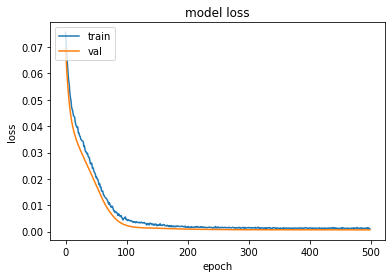

In [11]:
import matplotlib.pyplot as plt
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Fazer previsões e avaliar a rede treinada

###Exercício 1: Avalie a rede treinada com 500 dados amostrados com distribuição uniforme. Salve em uma variável chamada 'y_test' os dados gerados.

In [12]:
#criar base de teste
samples = 500

X_test = []
for sample in range(samples):
  input = []
  for i in range(n):
    input.append(random.random())
  X_test.append(input)

#converte para numpy array
X_test = np.array(X_test)

#Saída para cada input
y_test = []
for i in X_test:
  y_test.append(Griewank(i))

###Exercício 2: Utilize a rede neural para prever o resultado da função para as entradas geradas acima. Chame a variável com os resultados de 'y_pred'.

In [13]:
# Previsão da base de teste
y_pred = classifier.predict(X_test)

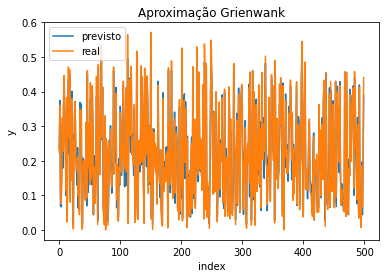

In [14]:
#Real vs. Previsto
plt.plot(y_pred)
plt.plot(y_test)
plt.title('Aproximação Grienwank')
plt.ylabel('y')
plt.xlabel('index')
plt.legend(['previsto', 'real'], loc='upper left')
plt.show()

###Exercício 3: Faça um plot como o acima, mas utilizando somente 50 amostras da base de teste.

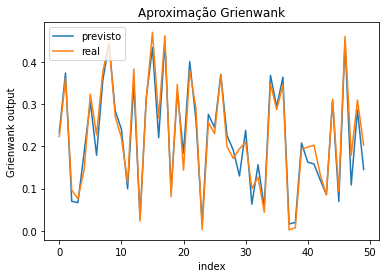

In [15]:
#Real vs. Previsto: parcial
small_y_test = y_test[0:50]
small_y_pred = y_pred[0:50]

plt.plot(small_y_pred)
plt.plot(small_y_test)
plt.title('Aproximação Grienwank')
plt.ylabel('Grienwank output')
plt.xlabel('index')
plt.legend(['previsto', 'real'], loc='upper left')
plt.show()

In [16]:
# calcular o erro para a base de teste
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_pred,y_test) 

0.0005971571309108379

## Análise de dados das distribuições

In [18]:
import random
n = 2
samples = 100

random_samples_analisis = []
for sample in range(samples):
  input = []
  for i in range(n):
    input.append(random.uniform(-512,512))
  random_samples_analisis.append(input)

#converte para numpy array
import numpy as np
random_samples_analisis = np.array(random_samples_analisis)

random_samples_analisis[0:5] # 5 primeiras amostras

array([[ 464.10487368, -292.08000771],
       [-213.2160865 ,  464.99340359],
       [-289.99103243,  345.42207817],
       [ 430.31728014,  -99.6735402 ],
       [ 197.40315758,  222.970789  ]])

In [19]:
#Saída para cada input
y_analisis = []
for i in random_samples_analisis:
  y_analisis.append(Griewank(i))

In [20]:
vx1 = random_samples_analisis[:,0]
vx2 = random_samples_analisis[:,1]

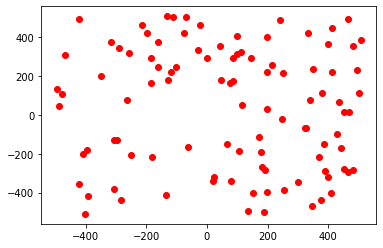

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x=vx1,y=vx2, marker='o', c='r')

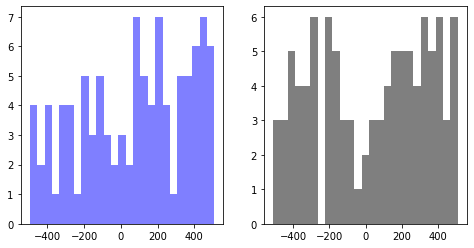

In [22]:
fig, (plt1, plt2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
num_bins = 25
n1, bins1, patches1 = plt1.hist(vx1, num_bins, facecolor='blue', alpha=0.5)
n2, bins2, patches2 =plt2.hist(vx2, num_bins, facecolor='black', alpha=0.5)

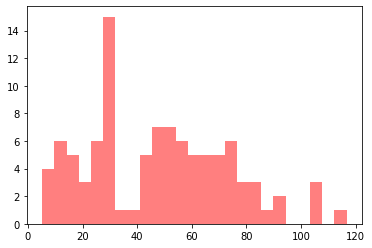

In [23]:
n3, bins3, patches3 = plt.hist(y_analisis, num_bins, facecolor='red', alpha=0.5)

### Função geradora de numero aleatório

- (Sequencia de Van der Corput)[https://en.wikipedia.org/wiki/Van_der_Corput_sequence ]. Veja o código e faça o mesmo procedimento:
  - Crie um vetor com esses numeros quasi-aleatórios
  - Crie outro vetor com a saida pela função
  - Faça uma avaliação das distribuições de entrada e de saída.
  
Procure no Google outras funções de geração de números quasi aleatórios e compare!

In [24]:
import math
def corput(n, base):
  q = 0
  bk = 1/base
  negative = 0
  if n<0:
    n = -n
    negative = 1

  while(n>0):
    q = q + ((n%base) * bk)
    n = math.floor(n/base)
    bk = bk/base
  if negative:
    return -q
  return q

In [25]:
corput(0.1,2)

0.05

In [26]:
def vdc_seq(i, l, u):
    v = 0
    p = 1
    d = u - l
    while i:
        v <<= 1
        if i & 1:
            v += d
        i >>= 1
        p <<= 1
    return l + v / p

In [27]:
import random
from functools import partial

In [ ]:
samples = 100
list(map(partial(vdc_seq, l=-512, u=512), range(samples)))

In [29]:
import random
from functools import partial
n = 2
samples = 100

x_qtd = int(math.sqrt(samples))
y_qtd = x_qtd

van_der_corput_sequence = list(map(partial(vdc_seq, l=-512, u=512), range(samples)))

random_corput_samples_analisis = []
for x in range(0, samples-x_qtd+1, x_qtd):
  for y in range(y_qtd):
    input = []
    input.append(van_der_corput_sequence[x])
    input.append(van_der_corput_sequence[y])
    random_corput_samples_analisis.append(input)


#converte para numpy array
import numpy as np
random_corput_samples_analisis = np.array(random_corput_samples_analisis)

random_corput_samples_analisis[:5] # 5 primeiras amostras

array([[-512., -512.],
       [-512.,    0.],
       [-512., -256.],
       [-512.,  256.],
       [-512., -384.]])

In [30]:
#Saída para cada input
y_corput_analisis = []
for i in random_corput_samples_analisis:
  y_corput_analisis.append(Griewank(i))

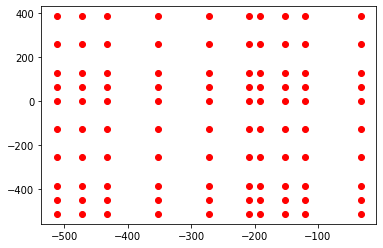

In [31]:
vx1_corput = random_corput_samples_analisis[:,0]
vx2_corput = random_corput_samples_analisis[:,1]

import matplotlib.pyplot as plt
plt.scatter(x=vx1_corput,y=vx2_corput, marker='o', c='r')

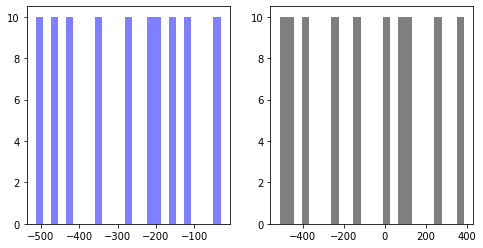

In [32]:
fig, (plt1, plt2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
num_bins = 25
n1, bins1, patches1 = plt1.hist(vx1_corput, num_bins, facecolor='blue', alpha=0.5)
n2, bins2, patches2 =plt2.hist(vx2_corput, num_bins, facecolor='black', alpha=0.5)

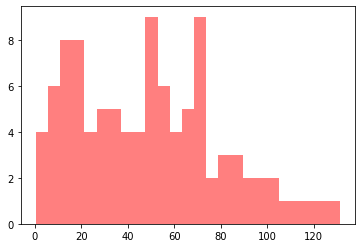

In [33]:
n3, bins3, patches3 = plt.hist(y_corput_analisis, num_bins, facecolor='red', alpha=0.5)

Utilizando outro método com conexões externas

In [34]:
!pip install quantumrandom

  Created wheel for quantumrandom: filename=quantumrandom-1.9.0-cp36-none-any.whl size=9133 sha256=4679c9e37ca3afd7e6bf03ccbee1093cda2f5ec3cac3c2de81e19eac1b6180f0
  Stored in directory: /root/.cache/pip/wheels/8b/de/bc/12078c164eb001e81d04661804325d0e153fa2881953fd8610
Successfully built quantumrandom


In [35]:
import quantumrandom

In [36]:
import random
n = 2
samples = 100

random_pseudo_samples_analisis = []
for sample in range(samples):
  input = []
  for i in range(n):
    input.append(quantumrandom.randint(-512, 512))
  random_pseudo_samples_analisis.append(input)

#converte para numpy array
import numpy as np
random_pseudo_samples_analisis = np.array(random_pseudo_samples_analisis)

random_pseudo_samples_analisis[0:5] # 5 primeiras amostras

array([[ 220.0111696 , -130.04104677],
       [-105.21254292,  -65.11818112],
       [ 481.17140459,  369.40407416],
       [  69.3369955 ,  -18.054963  ],
       [-356.09137102,  -67.82134737]])

In [37]:
#Saída para cada input
y_pseudo_analisis = []
for i in random_pseudo_samples_analisis:
  y_pseudo_analisis.append(Griewank(i))

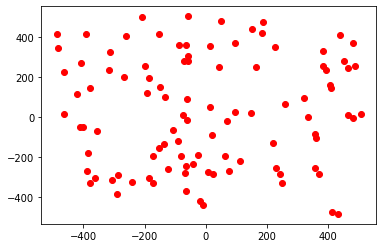

In [38]:
vx1_pseudo = random_pseudo_samples_analisis[:,0]
vx2_pseudo = random_pseudo_samples_analisis[:,1]

import matplotlib.pyplot as plt
plt.scatter(x=vx1_pseudo,y=vx2_pseudo, marker='o', c='r')

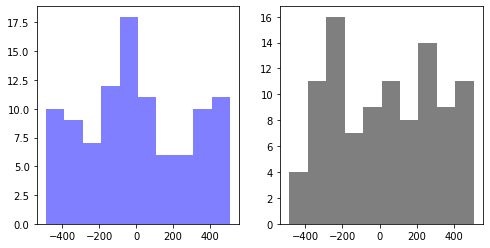

In [39]:
fig, (plt1, plt2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
num_bins = 10
n1, bins1, patches1 = plt1.hist(vx1_pseudo, num_bins, facecolor='blue', alpha=0.5)
n2, bins2, patches2 =plt2.hist(vx2_pseudo, num_bins, facecolor='black', alpha=0.5)

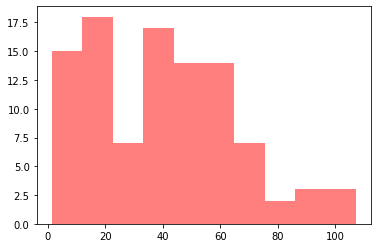

In [40]:
n3, bins3, patches3 = plt.hist(y_pseudo_analisis, num_bins, facecolor='red', alpha=0.5)